# Modelling

In [41]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error

##### Import Train Data

In [2]:
trips_df = pd.read_csv("data/processed_data/trips_2022.csv")

In [3]:
trips_df.drop(columns=["Unnamed: 0", "date"], inplace=True)

In [4]:
trips_df

,PULocationID,time,temperature_2m (°C),apparent_temperature (°C),rain (mm),windspeed_10m (km/h)
0,114,0,23.8,25.9,0.0,10.4
1,79,0,23.8,25.9,0.0,10.4
2,79,0,23.8,25.9,0.0,10.4
3,138,0,23.8,25.9,0.0,10.4
4,137,0,23.8,25.9,0.0,10.4
...,...,...,...,...,...,...
9115443,230,23,13.2,12.9,1.5,7.6
9115444,79,23,13.2,12.9,1.5,7.6
9115445,79,23,13.2,12.9,1.5,7.6
9115446,263,23,13.2,12.9,1.5,7.6


In [5]:
count_series = trips_df.groupby(['PULocationID', 'time']).size()
trips_location_time = count_series.to_frame(name = 'size').reset_index()

In [6]:
trips_location_time

,PULocationID,time,size
0,1,1,2
1,1,2,3
2,1,3,1
3,1,4,6
4,1,5,18
...,...,...,...
5408,263,19,12027
5409,263,20,10365
5410,263,21,9901
5411,263,22,8946


In [7]:
trips_df = pd.merge(trips_df, trips_location_time, on=['PULocationID', 'time'], how='left')

In [8]:
trips_df.rename(columns={"size": "number of trips"}, inplace=True)

In [9]:
trips_df

,PULocationID,time,temperature_2m (°C),apparent_temperature (°C),rain (mm),windspeed_10m (km/h),number of trips
0,114,0,23.8,25.9,0.0,10.4,7963
1,79,0,23.8,25.9,0.0,10.4,17316
2,79,0,23.8,25.9,0.0,10.4,17316
3,138,0,23.8,25.9,0.0,10.4,8562
4,137,0,23.8,25.9,0.0,10.4,3505
...,...,...,...,...,...,...,...
9115443,230,23,13.2,12.9,1.5,7.6,13865
9115444,79,23,13.2,12.9,1.5,7.6,18916
9115445,79,23,13.2,12.9,1.5,7.6,18916
9115446,263,23,13.2,12.9,1.5,7.6,6522


In [10]:
X = trips_df.iloc[:, :-1]
y = trips_df.iloc[:, -1:]

In [11]:
X

,PULocationID,time,temperature_2m (°C),apparent_temperature (°C),rain (mm),windspeed_10m (km/h)
0,114,0,23.8,25.9,0.0,10.4
1,79,0,23.8,25.9,0.0,10.4
2,79,0,23.8,25.9,0.0,10.4
3,138,0,23.8,25.9,0.0,10.4
4,137,0,23.8,25.9,0.0,10.4
...,...,...,...,...,...,...
9115443,230,23,13.2,12.9,1.5,7.6
9115444,79,23,13.2,12.9,1.5,7.6
9115445,79,23,13.2,12.9,1.5,7.6
9115446,263,23,13.2,12.9,1.5,7.6


In [12]:
y

,number of trips
0,7963
1,17316
2,17316
3,8562
4,3505
...,...
9115443,13865
9115444,18916
9115445,18916
9115446,6522


##### Import Test Data

In [24]:
test_trips_df = pd.read_csv("data/processed_data/trips_2023.csv")

In [25]:
test_trips_df.drop(columns=["Unnamed: 0", "date"], inplace=True)

In [26]:
test_trips_df

,PULocationID,time,temperature_2m (°C),apparent_temperature (°C),rain (mm),windspeed_10m (km/h)
0,138,0,-2.9,-6.8,0.0,8.8
1,140,0,-2.9,-6.8,0.0,8.8
2,79,0,-2.9,-6.8,0.0,8.8
3,162,0,-2.9,-6.8,0.0,8.8
4,170,0,-2.9,-6.8,0.0,8.8
...,...,...,...,...,...,...
9409518,239,23,14.6,14.8,0.0,4.6
9409519,79,23,14.6,14.8,0.0,4.6
9409520,186,23,14.6,14.8,0.0,4.6
9409521,170,23,14.6,14.8,0.0,4.6


In [27]:
count_series = test_trips_df.groupby(['PULocationID', 'time']).size()
test_trips_location_time = count_series.to_frame(name = 'size').reset_index()

In [28]:
test_trips_location_time

,PULocationID,time,size
0,1,0,1
1,1,3,1
2,1,4,6
3,1,5,7
4,1,6,15
...,...,...,...
5405,263,19,11023
5406,263,20,10137
5407,263,21,9643
5408,263,22,8709


In [29]:
test_trips_df = pd.merge(test_trips_df, test_trips_location_time, on=['PULocationID', 'time'], how='left')

In [30]:
test_trips_df.rename(columns={"size": "number of trips"}, inplace=True)

In [31]:
test_trips_df

,PULocationID,time,temperature_2m (°C),apparent_temperature (°C),rain (mm),windspeed_10m (km/h),number of trips
0,138,0,-2.9,-6.8,0.0,8.8,9832
1,140,0,-2.9,-6.8,0.0,8.8,1648
2,79,0,-2.9,-6.8,0.0,8.8,18594
3,162,0,-2.9,-6.8,0.0,8.8,4778
4,170,0,-2.9,-6.8,0.0,8.8,5031
...,...,...,...,...,...,...,...
9409518,239,23,14.6,14.8,0.0,4.6,7110
9409519,79,23,14.6,14.8,0.0,4.6,19451
9409520,186,23,14.6,14.8,0.0,4.6,12096
9409521,170,23,14.6,14.8,0.0,4.6,9074


In [32]:
test_X = test_trips_df.iloc[:, :-1]
test_y = test_trips_df.iloc[:, -1:]

In [33]:
test_X

,PULocationID,time,temperature_2m (°C),apparent_temperature (°C),rain (mm),windspeed_10m (km/h)
0,138,0,-2.9,-6.8,0.0,8.8
1,140,0,-2.9,-6.8,0.0,8.8
2,79,0,-2.9,-6.8,0.0,8.8
3,162,0,-2.9,-6.8,0.0,8.8
4,170,0,-2.9,-6.8,0.0,8.8
...,...,...,...,...,...,...
9409518,239,23,14.6,14.8,0.0,4.6
9409519,79,23,14.6,14.8,0.0,4.6
9409520,186,23,14.6,14.8,0.0,4.6
9409521,170,23,14.6,14.8,0.0,4.6


In [34]:
test_y

,number of trips
0,9832
1,1648
2,18594
3,4778
4,5031
...,...
9409518,7110
9409519,19451
9409520,12096
9409521,9074


# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model1 = LinearRegression()

In [46]:
model1.fit(X, y)

LinearRegression()

In [48]:
yhat1 = model1.predict(test_X)

In [53]:
mean_squared_error(yhat1, test_y)

73526509.16067907

# Gradient Boosting 

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
model2 = GradientBoostingRegressor()

In [16]:
model2.fit(X, y)

C:\Users\hoand\anaconda3\envs\MAST30034\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [54]:
yhat = model2.predict(test_X)

In [55]:
mean_squared_error(yhat, test_y)

17182852.19760493

# Plot the Predicted Results against the Truth values

In [52]:
import matplotlib.pyplot as plt

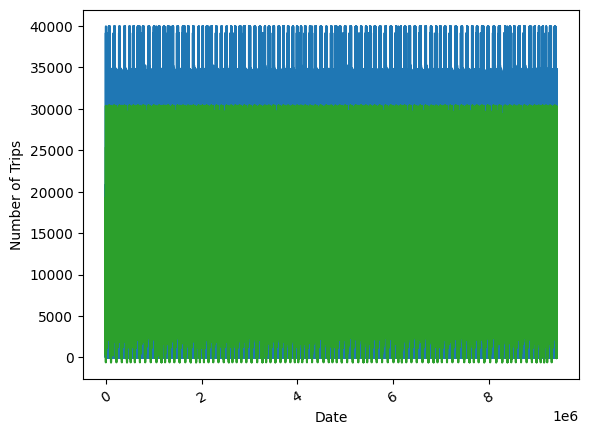

In [58]:
plt.plot(test_y)
plt.plot(yhat1)
plt.plot(yhat)
plt.title('')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Number of Trips')
plt.show()